In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from pandas import DataFrame
from sklearn.svm import SVC
%matplotlib inline 
import plotly.express as px
from sklearn.metrics import confusion_matrix,classification_report
import plotly.graph_objects as go

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
knn2_data = pd.read_csv('/content/gdrive/MyDrive/MACHINE LEARNING ALGORITHM 1/14-K-Nearest-Neighbors/KNN_Project_Data')

In [5]:
knn2_data.head(5)

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


In [6]:
knn2_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   XVPM          1000 non-null   float64
 1   GWYH          1000 non-null   float64
 2   TRAT          1000 non-null   float64
 3   TLLZ          1000 non-null   float64
 4   IGGA          1000 non-null   float64
 5   HYKR          1000 non-null   float64
 6   EDFS          1000 non-null   float64
 7   GUUB          1000 non-null   float64
 8   MGJM          1000 non-null   float64
 9   JHZC          1000 non-null   float64
 10  TARGET CLASS  1000 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 86.1 KB


In [8]:
knn2_data.describe()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,1055.071157,991.851567,1529.373525,495.107156,940.590072,1550.637455,1561.003252,561.346117,1089.067338,1452.521629,0.50000
std,370.980193,392.278890,640.286092,142.789188,345.923136,493.491988,598.608517,247.357552,402.666953,568.132005,0.50025
min,21.170000,21.720000,31.800000,8.450000,17.930000,27.930000,31.960000,13.520000,23.210000,30.890000,0.00000
25%,767.413366,694.859326,1062.600806,401.788135,700.763295,1219.267077,1132.097865,381.704293,801.849802,1059.499689,0.00000
50%,1045.904805,978.355081,1522.507269,500.197421,939.348662,1564.996551,1565.882879,540.420379,1099.087954,1441.554053,0.50000
75%,1326.065178,1275.528770,1991.128626,600.525709,1182.578166,1891.937040,1981.739411,725.762027,1369.923665,1864.405512,1.00000
max,2117.000000,2172.000000,3180.000000,845.000000,1793.000000,2793.000000,3196.000000,1352.000000,2321.000000,3089.000000,1.00000


In [18]:
x = knn2_data.drop(['TARGET CLASS'],axis=1)
y = knn2_data['TARGET CLASS']

In [19]:
sd = StandardScaler().fit(x)
x_sd = sd.transform(x)

In [20]:
x_sd = pd.DataFrame(x_sd,index=x.index,columns=x.columns)

In [23]:
norm_feature = pd.concat([x_sd,y],axis=1)

In [29]:
fig = px.scatter_matrix(norm_feature,color='TARGET CLASS')
fig.update_layout(
    title='DATA CLASSIFICATION',
    dragmode='select',
    width=1200,
    height=1000,
    hovermode='closest',
)
fig.show()

In [30]:
x_train,x_test,y_train,y_test = train_test_split(x_sd,y,test_size=0.3,random_state=101)

In [35]:
error_rate =[]
for i in range(1,100):
  knn = KNeighborsClassifier(n_neighbors=i,n_jobs=-1)
  knn.fit(x_train,y_train)
  prediction = knn.predict(x_test)
  error_rate.append(np.mean(y_test!=prediction))

In [36]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=list(range(1,100)),y=error_rate,mode='lines+markers',name='lines+markers'))
fig.show()

In [37]:
knn = KNeighborsClassifier(n_neighbors=31,n_jobs=-1)
knn.fit(x_train,y_train)
prediction = knn.predict(x_test)

CLASSIFICATION REPORT FOR KNN K=31 :
              precision    recall  f1-score   support

           0       0.87      0.81      0.84       152
           1       0.82      0.87      0.84       148

    accuracy                           0.84       300
   macro avg       0.84      0.84      0.84       300
weighted avg       0.84      0.84      0.84       300



ACCURACY SCORE : 0.84





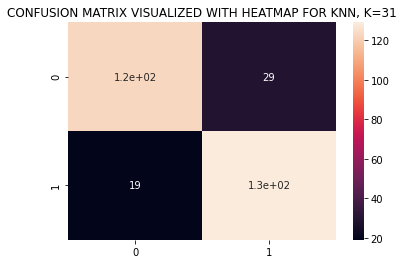

In [39]:
print('CLASSIFICATION REPORT FOR KNN K=31 :\n{}\n\n'.format(classification_report(y_test,prediction)))
print('ACCURACY SCORE : {}\n\n\n'.format(accuracy_score(y_test,prediction)))
sns.heatmap(confusion_matrix(y_test,prediction),annot=True)
plt.title('CONFUSION MATRIX VISUALIZED WITH HEATMAP FOR KNN, K=31')
plt.show()

In [40]:
norm = MinMaxScaler().fit(x)
x_norm = norm.transform(x)

In [41]:
norm1_feature = pd.DataFrame(x_norm,index = x.index,columns=x.columns)

In [43]:
xn_train,xn_test,yn_train,yn_test = train_test_split(norm1_feature,y,test_size=0.3,random_state=101)

In [48]:
errorn_rate =[]
for i in range(1,100):
  knn = KNeighborsClassifier(n_neighbors=i,n_jobs=-1)
  knn.fit(xn_train,yn_train)
  prediction = knn.predict(xn_test)
  errorn_rate.append(np.mean(yn_test!=prediction))

In [49]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=list(range(1,100)),y=errorn_rate,mode='lines+markers',name='lines+markers'))
fig.show()

In [52]:
knn = KNeighborsClassifier(n_neighbors=9,n_jobs=-1)
knn.fit(xn_train,yn_train)
prediction = knn.predict(xn_test)


CLASSIFICATION REPORT FOR KNN K=35 :
              precision    recall  f1-score   support

           0       0.85      0.83      0.84       152
           1       0.83      0.85      0.84       148

    accuracy                           0.84       300
   macro avg       0.84      0.84      0.84       300
weighted avg       0.84      0.84      0.84       300



ACCURACY SCORE : 0.84





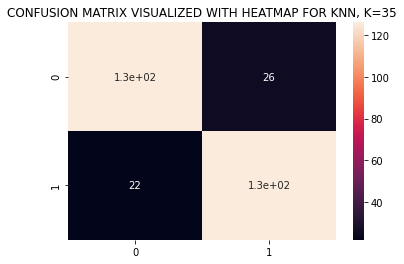

In [53]:
print('CLASSIFICATION REPORT FOR KNN K=35 :\n{}\n\n'.format(classification_report(yn_test,prediction)))
print('ACCURACY SCORE : {}\n\n\n'.format(accuracy_score(yn_test,prediction)))
sns.heatmap(confusion_matrix(yn_test,prediction),annot=True)
plt.title('CONFUSION MATRIX VISUALIZED WITH HEATMAP FOR KNN, K=35')
plt.show()

**1. THE KNN MODEL WHEN TRAINED WITH STANDARDIZED DATA WE ACIEVE A ACCURACY OF 85% WITH LESS FALSE RESULTS**

**2.BUT WITH KNN MODEL WHEN TRAINED WITH NORMALIZED DATA WE ACHIEVE A ACCURACY OF 84.33%, HENCE WE USE STANDARDIZED DATA**